<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/PROBLEMA_STURM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:;">Sturm-Liouville</span>

## <span style="color:brown;">Resolver la ecuación diferencial

1. $X''+ λX=0 \quad X(0)=X(1)=0$
2. $X''+ λX=0 \quad X'(0)=X'(1)=0$</span>





Declaramos las siguientes librerías:

In [ ]:
from sympy import *
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

Definimos las variables: $x \quad k \quad X \quad C1 \quad C2$

In [ ]:
x = sp.symbols('x')
X = sp.Function('X')
k = sp.pi**2
C1, C2 = sp.symbols('C1 C2')


Declaramos la EDO bajo la cual estamos trabajando.

In [ ]:
ode = sp.Eq(X(x).diff(x, 2) + k*X(x), 0)


 * Aplicamos condicones de frontera: $X(0)=0, X(1)=0 $




In [ ]:
sol = sp.dsolve(ode, X(x))
Xsol = sol.rhs
sol

Eq(X(x), C1*sin(pi*x) + C2*cos(pi*x))

Considere:
$x(0)=x(1)=0$

In [ ]:
conds1 = [
    Xsol.subs(x, 0),
    Xsol.subs(x, 1)
]
sol_c1 = sp.solve(conds1, (C1, C2))
Xsol = Xsol = Xsol.subs(sol_c1).subs(C1, 1) # C2 es la constante libre

Xsol

sin(pi*x)

Proceso para Graficar:

In [ ]:
func1 = sp.lambdify(x, Xsol, 'numpy')
xx = np.linspace(0, 1, 200)
yy1 = func1(xx)


* Nuevas Condiciones de Frontera: X'(0)=0, X'(1)=0

In [ ]:
sol2 = sp.dsolve(ode, X(x))
Xsol2 = sol2.rhs
dXsol2 = Xsol2.diff(x)
sol2

Eq(X(x), C1*sin(pi*x) + C2*cos(pi*x))

In [ ]:
conds2 = [
    dXsol2.subs(x, 0),  # X'(0) = 0
    dXsol2.subs(x, 1)   # X'(1) = 0
]
sol_c2 = sp.solve(conds2, (C1, C2))
# Sustituimos con C1 variable libre
Xsol2 = Xsol2.subs(sol_c2).subs(C2, 1)
Xsol2

cos(pi*x)

Proceso para Graficar:

In [ ]:
func2 = sp.lambdify(x, Xsol2, 'numpy')
xx = np.linspace(0, 2, 200)
yy2 = func2(xx)


Gráficas Resultantes:

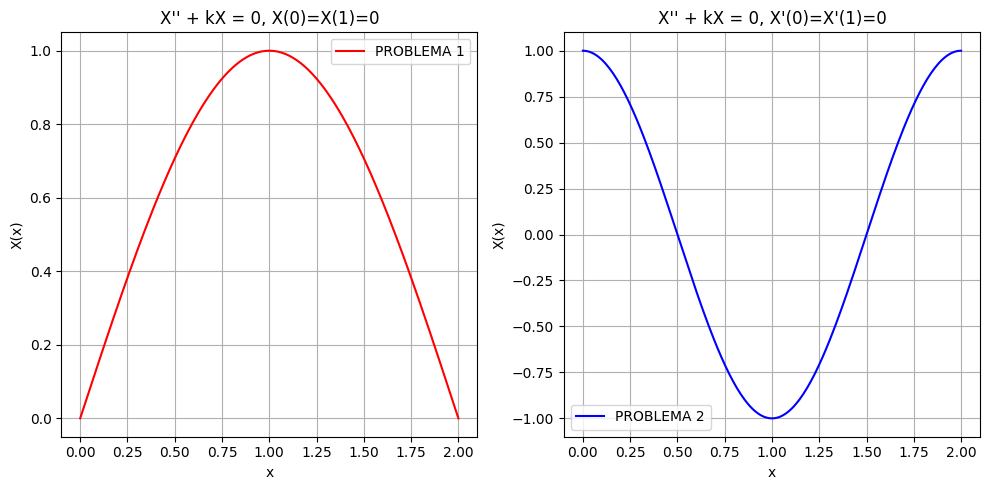

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(xx, yy1, 'r', label='PROBLEMA 1')
plt.title("X'' + kX = 0, X(0)=X(1)=0")
plt.xlabel('x')
plt.ylabel('X(x)')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(xx, yy2, 'b', label='PROBLEMA 2')
plt.title("X'' + kX = 0, X'(0)=X'(1)=0")
plt.xlabel('x')
plt.ylabel('X(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()